# LAB 2_1 Mandatory Assignments + Bonus Tracks
### Author: Aliprandi Francesco

This notebook contains both dataset 1 and dataset 2 solutions, with extra learning rules (BCM and Covariance Rules)

In [1]:
from utils import read_data, firing_rate_model, plot_1, plot_2, save_weights

import matplotlib.pyplot as plt 
import numpy as np

## Dataset 1

In [2]:
path = "data/lab2_1_data.csv"
u = read_data(path)

print(f"Dataset shape: {u.shape}")

Dataset shape: (2, 100)


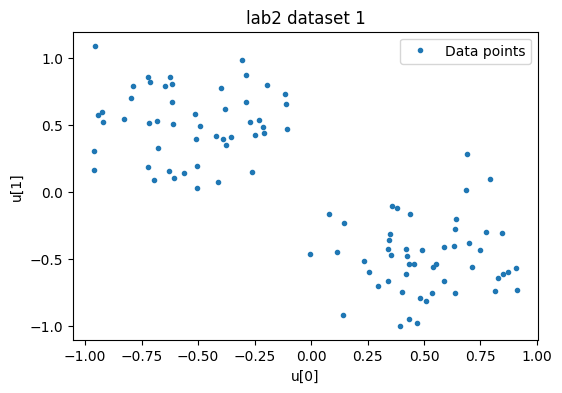

In [3]:
plt.figure(figsize=(6,4))
plt.plot(u[0], u[1], "o", markersize=3, label="Data points")
plt.xlabel("u[0]")
plt.ylabel("u[1]")
plt.title("lab2 dataset 1")
plt.legend()

plt.show()

### Assignment 1: Basic Hebbian Learning

In [4]:
epochs = 1000   
lr = 0.01
delta = 0.0001
     
w, w_history, convergence = firing_rate_model("hebb", u, epochs, lr, delta, seed=42)
save_weights(w_history, "hebb_rule", "dataset_1")

In [5]:
# Extra code to convert back weights if needed:
hebb_weights = np.load("outputs/dataset_1/hebb_rule/weights.npz")
hebb_weights = [hebb_weights[f"arr_{i}"] for i in range(len(hebb_weights.files))]
print(hebb_weights)

[array([-0.67991844,  1.37492178]), array([-1.46161845,  2.20516904]), array([-2.89033383,  3.6616856 ]), array([-5.44543158,  6.25950224]), array([-10.06970046,  10.84820725]), array([-18.30695055,  19.07177641]), array([-33.12112554,  33.67759041]), array([-59.62153656,  59.75099534]), array([-106.79626769,  106.5241024 ]), array([-191.28769786,  189.9214864 ]), array([-342.38276634,  338.85459985]), array([-613.32752304,  604.07419511]), array([-1093.6570329 ,  1081.92501182]), array([-1953.54486657,  1934.33790236]), array([-3495.31692285,  3452.47429107]), array([-6274.63656086,  6141.97373739]), array([-11155.16933218,  11035.21470274]), array([-19890.42287869,  19765.511321  ]), array([-35621.69822279,  35245.52285414]), array([-63787.00153663,  62856.16885416]), array([-113679.13810738,  112642.43050282]), array([-202908.67797698,  201549.72412399]), array([-362139.48920731,  360652.92887855]), array([-648373.44250619,  643281.15560183]), array([-1156617.19705133,  1151682.8805

In [6]:
q = np.cov(u)
eval, evec = np.linalg.eig(q)
p_evec = evec.T[np.argmax(eval)]

print(f"Correlation Matrix: \n{q}")
print(f"\nPrincipal eigenvector of input correlation matrix: {p_evec}")


Correlation Matrix: 
[[ 0.3297068  -0.26166261]
 [-0.26166261  0.32491515]]

Principal eigenvector of input correlation matrix: [ 0.71033647 -0.70386228]


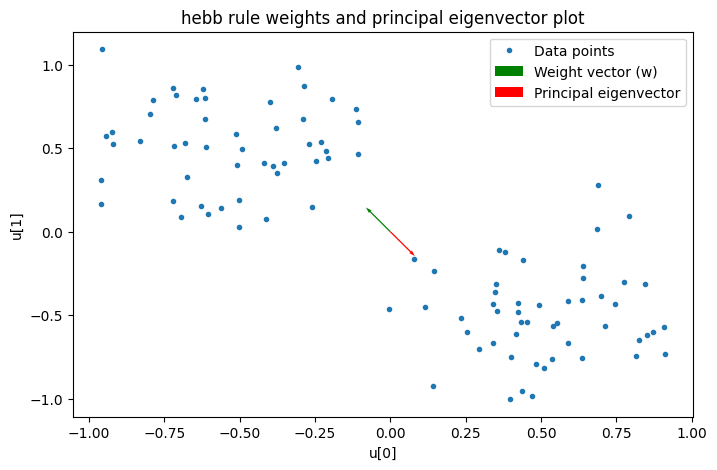

In [7]:
plot_1(u, w, p_evec, "hebb_rule", "dataset_1")

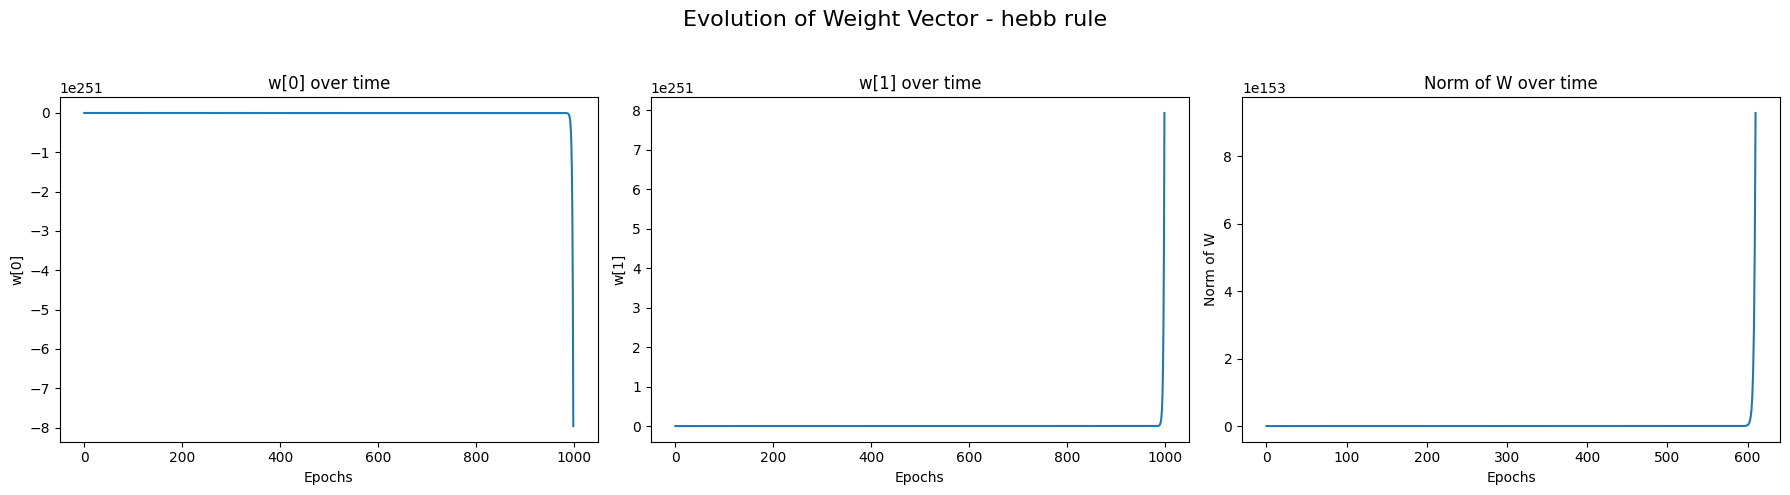

In [8]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "hebb_rule", "dataset_1")

Nota: the 3rd plot ends at iteration n. 600 because norm of weight vector become infinit

### Assignment 2: Oja rule

In [9]:
epochs = 1000   
lr = 0.001
delta = 0.000001
alpha = 0.01
     
w, w_history, convergence = firing_rate_model("oja", u, epochs, lr, delta, alpha=alpha, seed=42)
save_weights(w_history, "oja_rule", "dataset_1")

Convergence reach at epoch 226


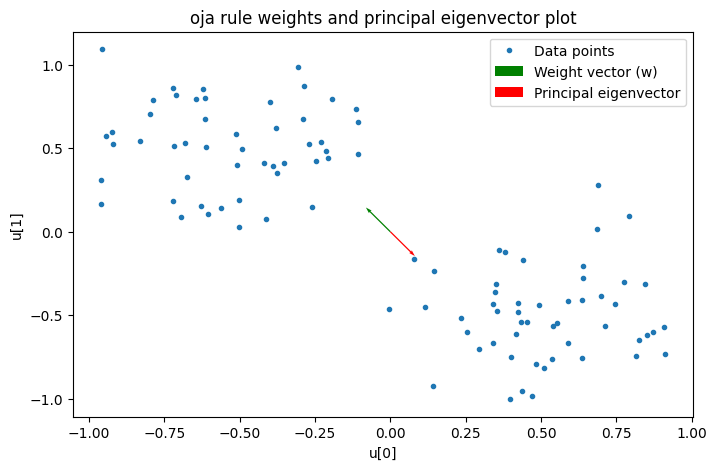

In [10]:
plot_1(u, w, p_evec, "oja_rule", "dataset_1")

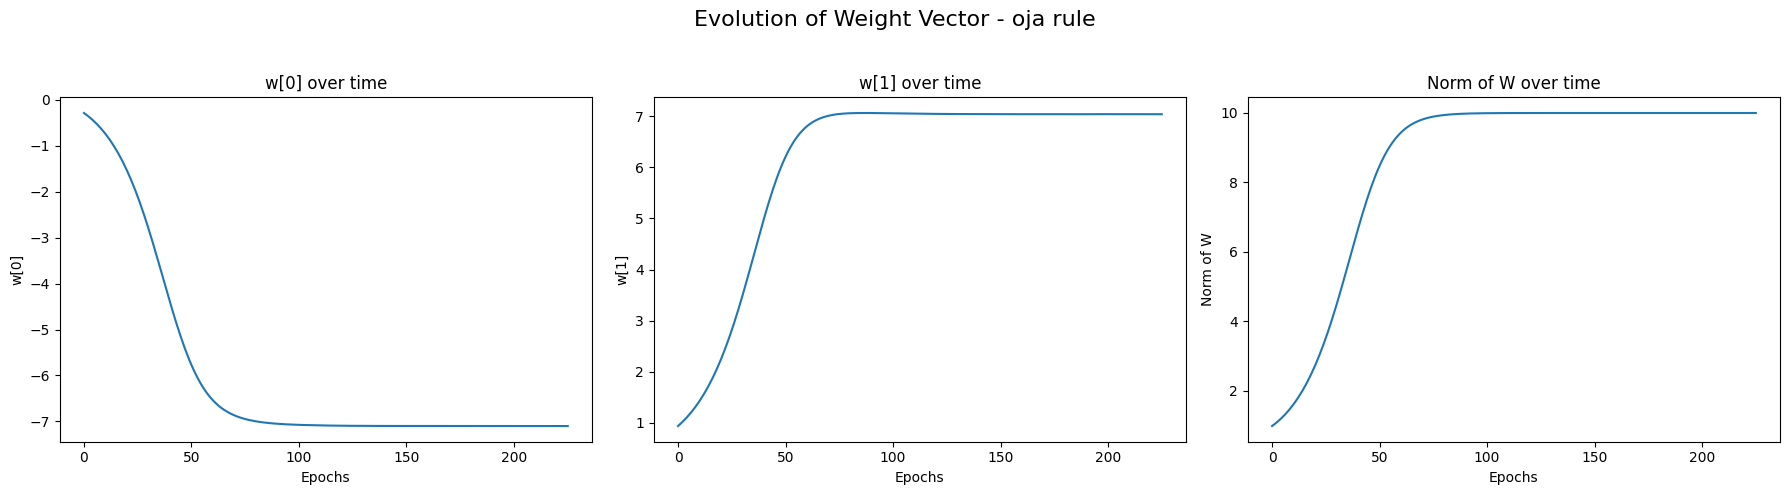

In [11]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "oja_rule", "dataset_1")

### Assignment 3: Subtractive Normalization

In [12]:
epochs = 1000  
lr = 0.001
delta = 0.00001
     
w, w_history, convergence = firing_rate_model("sub-norm", u, epochs, lr, delta, seed=42)
save_weights(w_history, "sub_norm_rule", "dataset_1")

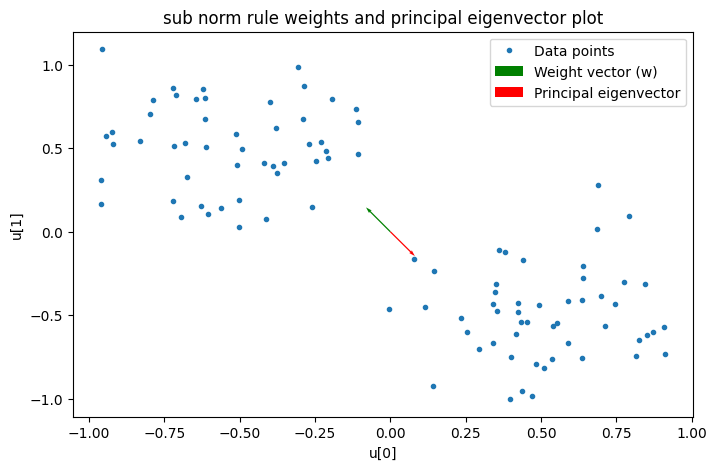

In [13]:
plot_1(u, w, p_evec, "sub_norm_rule", "dataset_1")

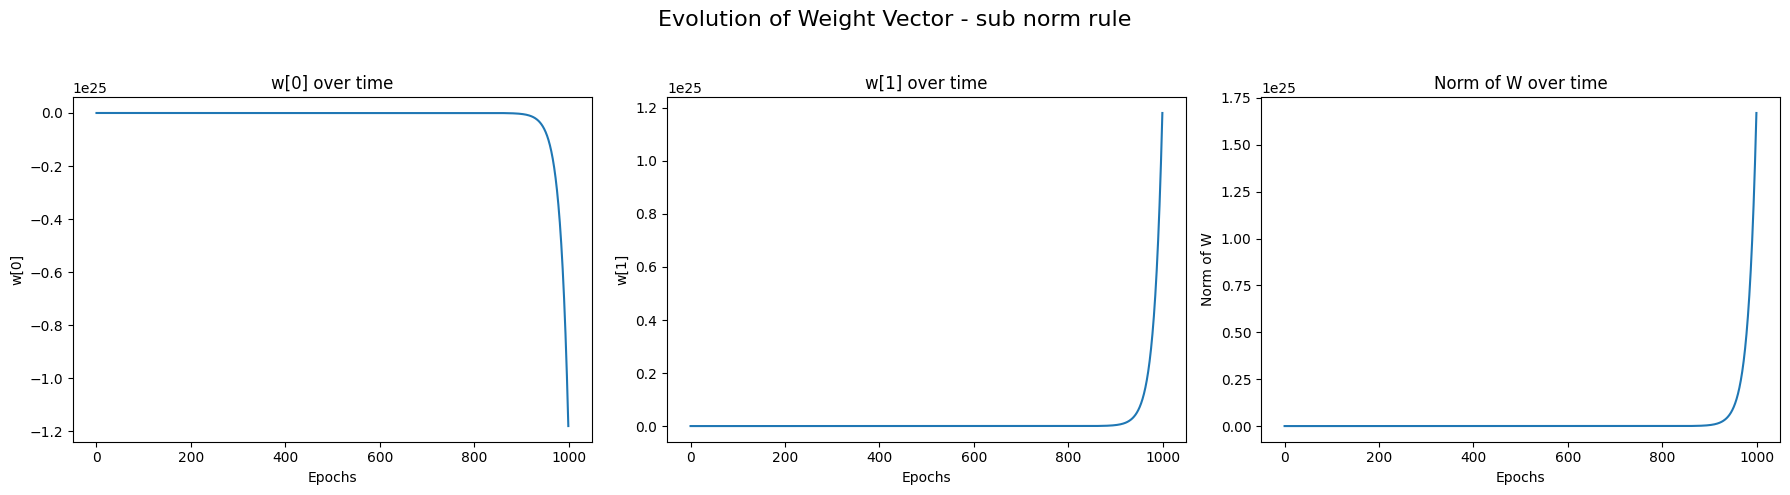

In [14]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "sub_norm_rule", "dataset_1")

#### Extra plot of weight's component summation

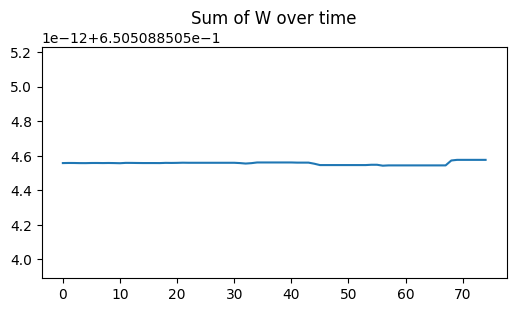

In [15]:
sum_hist = np.zeros(convergence)
for i,w in enumerate(w_history):
    sum_hist[i] = w[0] + w[1]
    
plt.figure(figsize=(6,3))
plt.plot(tspan[:75], sum_hist[:75])
plt.title("Sum of W over time")
plt.show()

This plot is cut because of instability in computation of the summation

### Bonus Track Assignment 1 – BCM Rule

In [16]:
epochs = 10000  
lr = 0.0005
delta = 0.00001
np.random.seed(42)
theta = np.random.uniform(0, 1)
     
w, w_history, convergence = firing_rate_model("BCM", u, epochs, lr, delta, theta=theta, seed=42)
save_weights(w_history, "BCM_rule", "dataset_1")

Convergence reach at epoch 5392


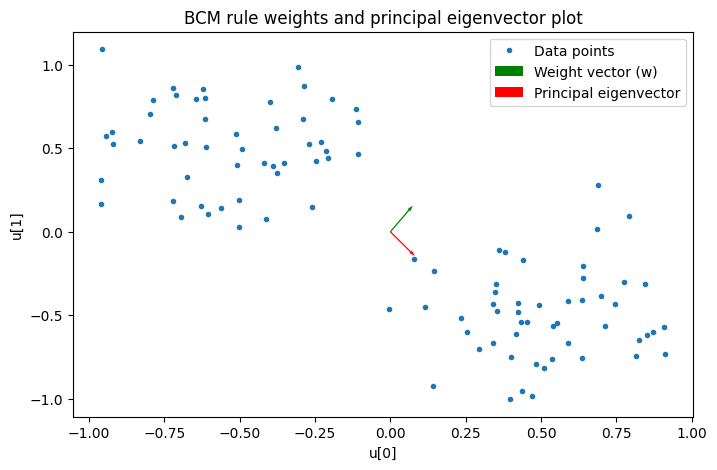

In [17]:
plot_1(u, w, p_evec, "BCM_rule", "dataset_1")

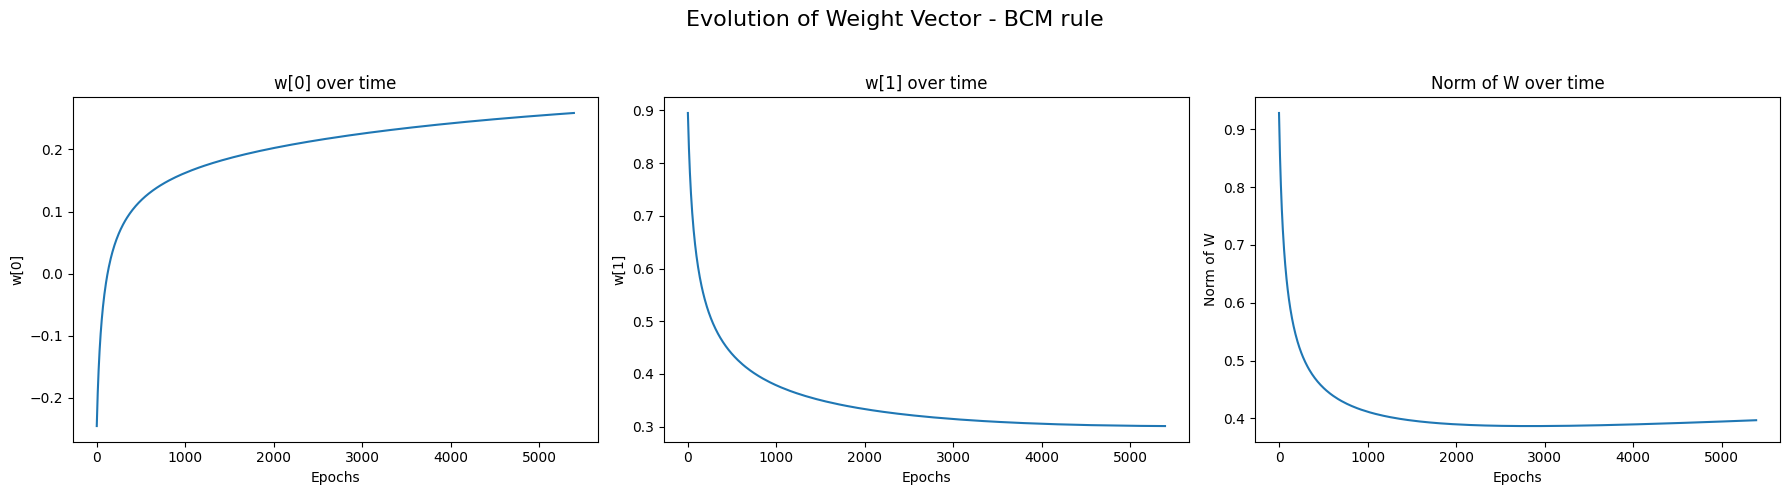

In [18]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "BCM_rule", "dataset_1")

### Bonus Track Assignment 2 – Covariance Rule

In [19]:
epochs = 1000  
lr = 0.001
delta = 0.00001
theta = 0.5
     
w, w_history, convergence = firing_rate_model("cov", u, epochs, lr, delta, theta=theta, seed=42)
save_weights(w_history, "covariance_rule", "dataset_1")

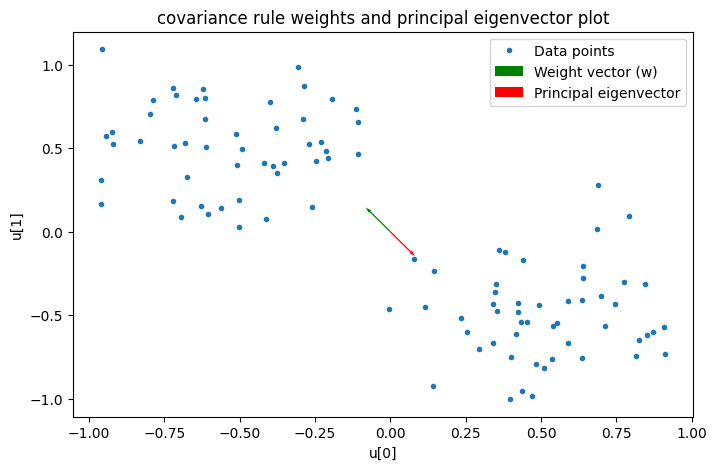

In [20]:
plot_1(u, w, p_evec, "covariance_rule", "dataset_1")

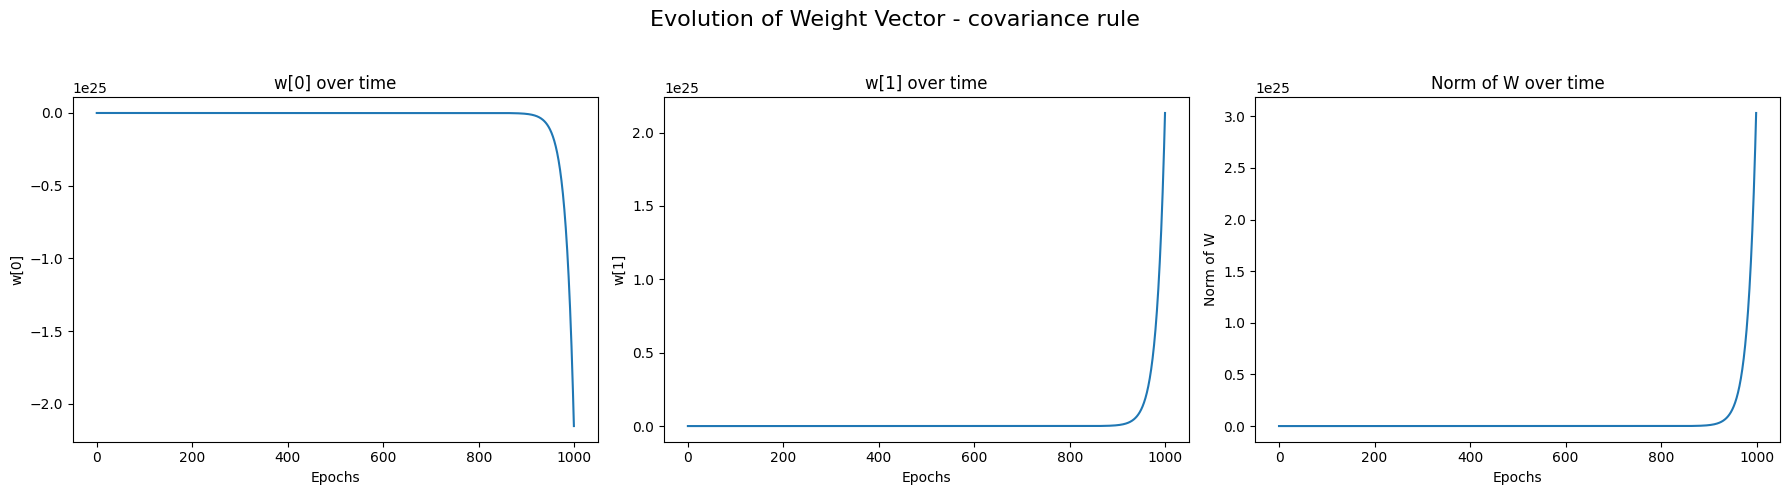

In [21]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "covariance_rule", "dataset_1")

## Dataset 2

In [22]:
from utils import read_data, firing_rate_model, plot_1, plot_2, save_weights

import matplotlib.pyplot as plt 
import numpy as np

In [23]:
path = "data/dataset2_lab_2_1.csv"
u = read_data(path)

print(f"Dataset shape: {u.shape}")

Dataset shape: (2, 406)


Rescale the dataset because of too big values affect the training process causing overflows

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
u = scaler.fit_transform(u.T).T

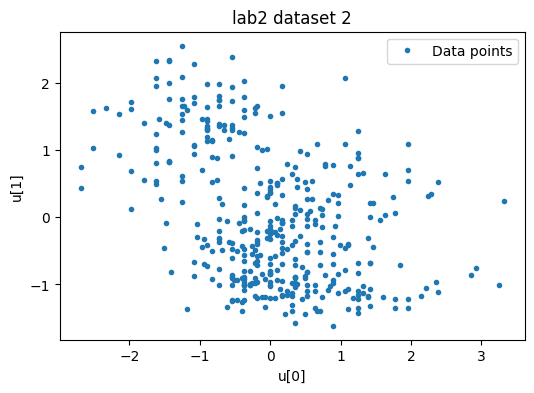

In [25]:
plt.figure(figsize=(6,4))
plt.plot(u[0], u[1], "o", markersize=3, label="Data points")
plt.xlabel("u[0]")
plt.ylabel("u[1]")
plt.title("lab2 dataset 2")
plt.legend()

plt.show()

### Assignment 1: Basic Hebbian Learning

In [26]:
epochs = 10000   
lr = 1e-5
delta = 1e-7
     
w, w_history, convergence = firing_rate_model("hebb", u, epochs, lr, delta, seed=42)
save_weights(w_history, "hebb_rule", "dataset_2")

In [27]:
# Extra code to convert back weights if needed:
hebb_weights = np.load("outputs/dataset_2/hebb_rule/weights.npz")
hebb_weights = [hebb_weights[f"arr_{i}"] for i in range(len(hebb_weights.files))]
print(hebb_weights)

[array([-0.2535213 ,  0.90553709]), array([-0.25614072,  0.90966682]), array([-0.25877784,  0.91381802]), array([-0.26143313,  0.91799068]), array([-0.26410657,  0.92218497]), array([-0.26679818,  0.92640103]), array([-0.26950818,  0.93063897]), array([-0.2722367 ,  0.93489888]), array([-0.2749836 ,  0.93918096]), array([-0.27774963,  0.94348516]), array([-0.28053402,  0.94781186]), array([-0.2833374 ,  0.95216102]), array([-0.28615964,  0.95653285]), array([-0.28900111,  0.9609274 ]), array([-0.29186195,  0.96534479]), array([-0.29474184,  0.96978526]), array([-0.29764175,  0.97424871]), array([-0.30056129,  0.9787354 ]), array([-0.30350051,  0.98324549]), array([-0.30645962,  0.98777908]), array([-0.30943849,  0.99233638]), array([-0.31243755,  0.99691743]), array([-0.31545663,  1.00152245]), array([-0.31849654,  1.00615135]), array([-0.32155662,  1.01080452]), array([-0.32463727,  1.01548201]), array([-0.3277389 ,  1.02018385]), array([-0.33086141,  1.02491027]), array([-0.3340047 ,

In [28]:
q = np.cov(u)
eval, evec = np.linalg.eig(q)
p_evec = evec.T[np.argmax(eval)]

print(f"Correlation Matrix: \n{q}")
print(f"\nPrincipal eigenvector of input correlation matrix: {p_evec}")


Correlation Matrix: 
[[ 1.00246914 -0.43114775]
 [-0.43114775  1.00246914]]

Principal eigenvector of input correlation matrix: [ 0.70710678 -0.70710678]


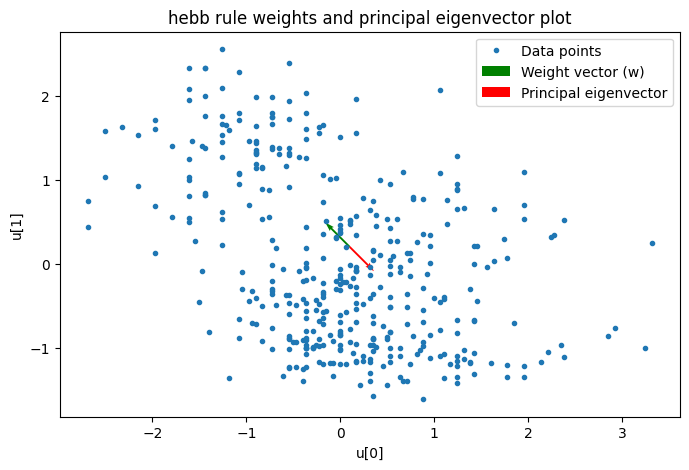

In [29]:
plot_1(u, w, p_evec, "hebb_rule", "dataset_2")

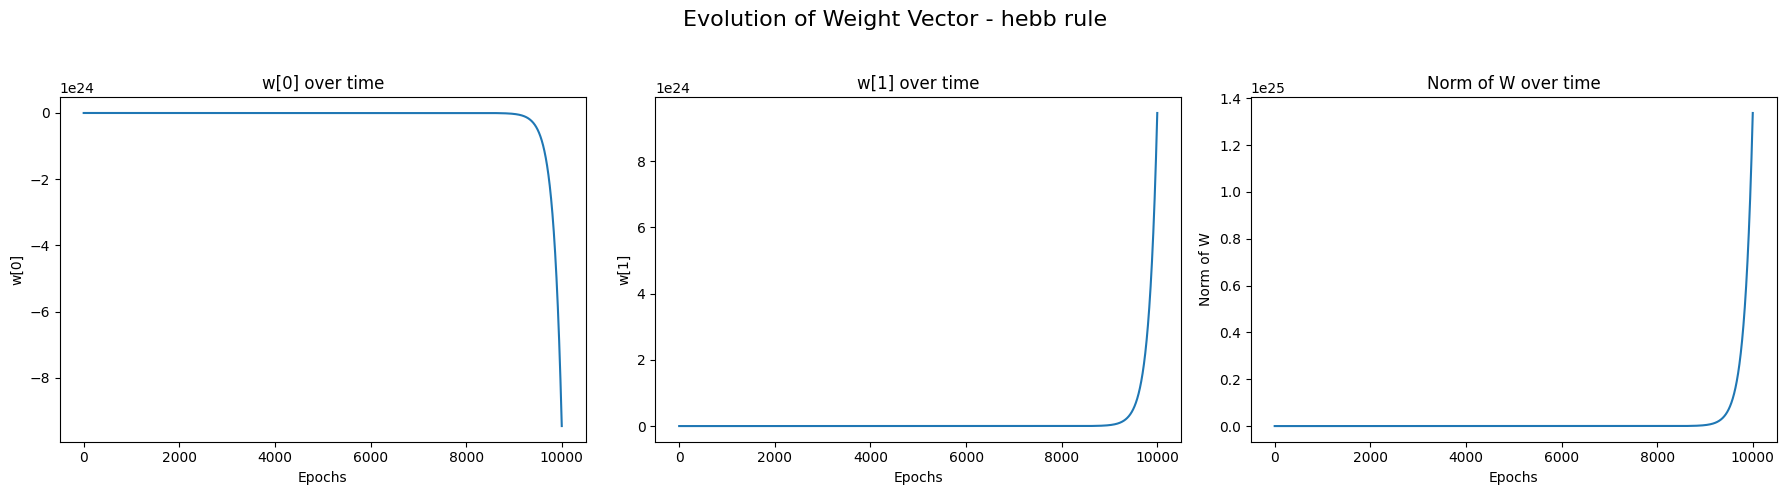

In [30]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "hebb_rule", "dataset_2")

Nota: the 3rd plot ends at iteration n. 600 because norm of weight vector become infinit

### Assignment 2: Oja rule

In [31]:
epochs = 10000   
lr = 0.001
delta = 0.000001
alpha = 0.01
     
w, w_history, convergence = firing_rate_model("oja", u, epochs, lr, delta, alpha=alpha, seed=42)
save_weights(w_history, "oja_rule", "dataset_2")

Nota: the higher alpha the less epochs the model needs to converge

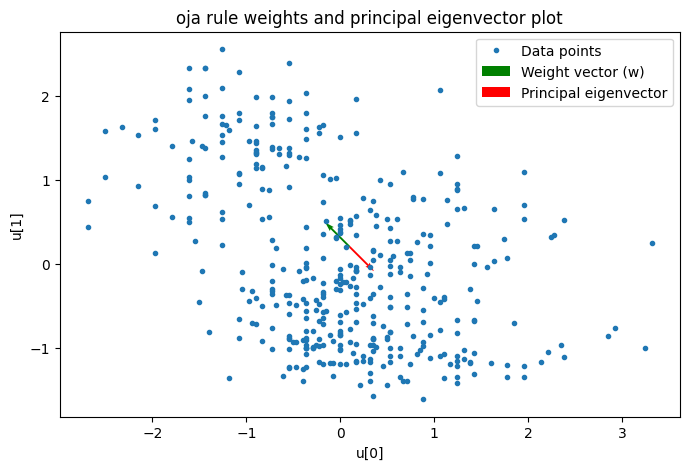

In [32]:
plot_1(u, w, p_evec, "oja_rule", "dataset_2")

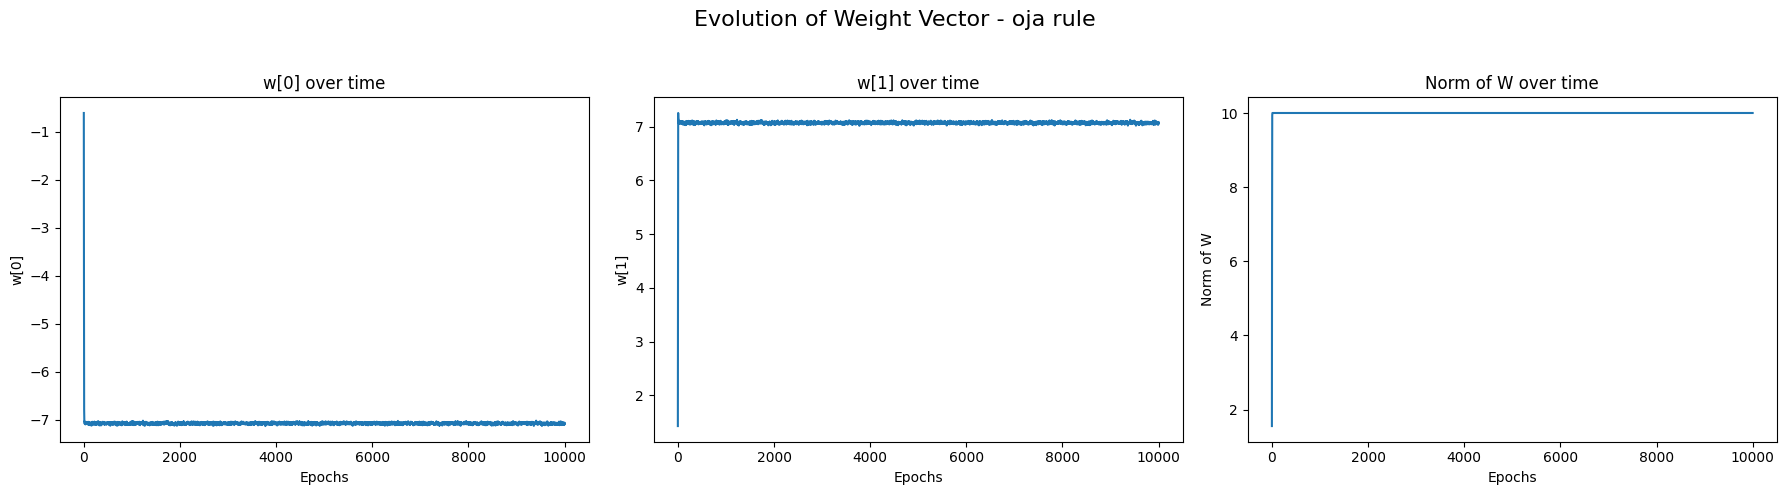

In [33]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "oja_rule", "dataset_2")

### Assignment 3: Subtractive Normalization

In [56]:
epochs = 1000
lr = 0.001
delta = 0.00001
     
w, w_history, convergence = firing_rate_model("sub-norm", u, epochs, lr, delta, seed=42)
save_weights(w_history, "sub_norm_rule", "dataset_2")

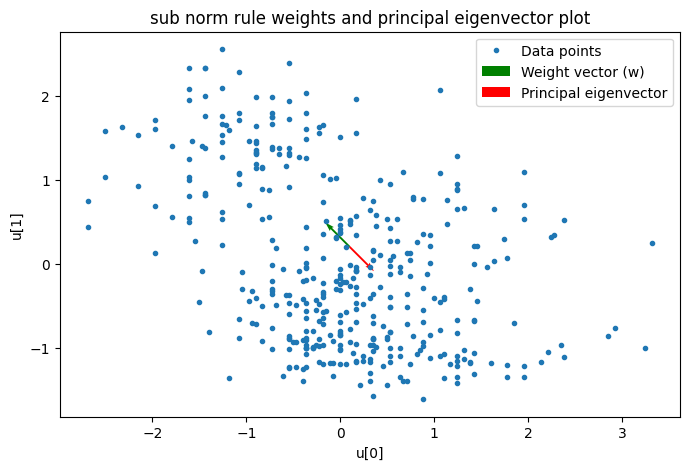

In [57]:
plot_1(u, w, p_evec, "sub_norm_rule", "dataset_2")

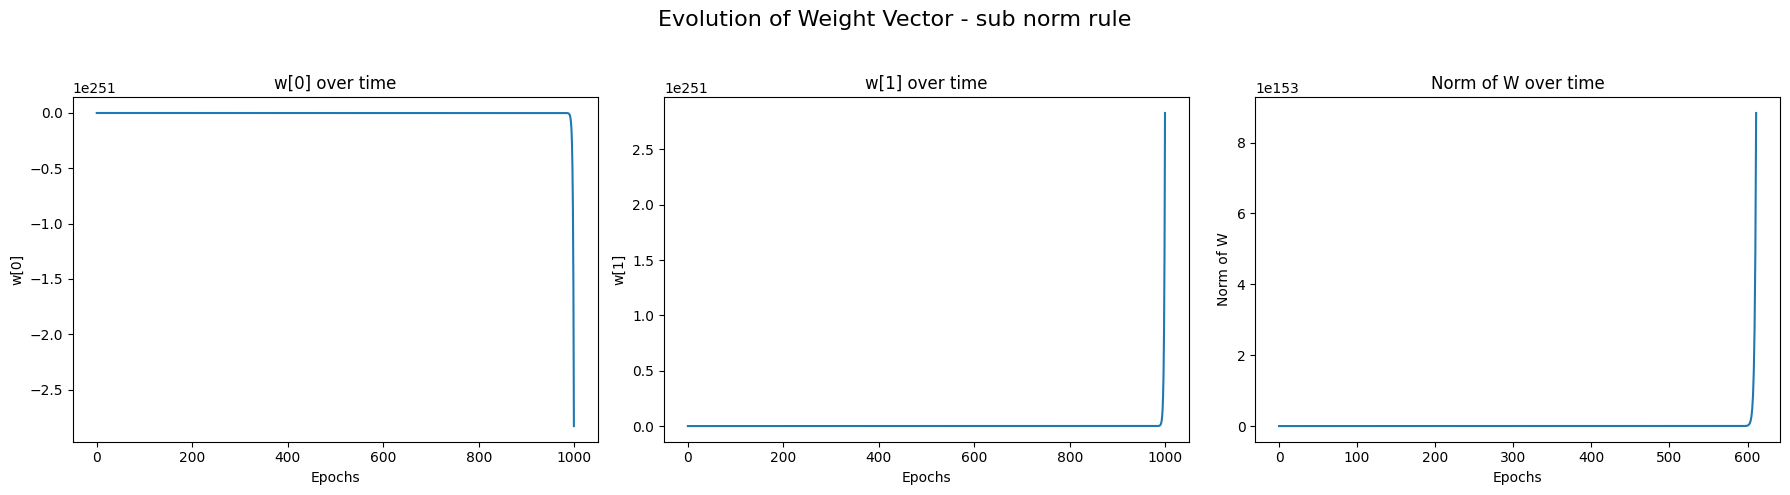

In [58]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "sub_norm_rule", "dataset_2")

#### Extra plot of weight's component summation

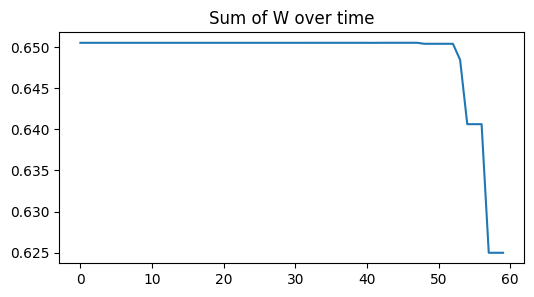

In [63]:
sum_hist = np.zeros(convergence)
for i,w in enumerate(w_history):
    sum_hist[i] = w[0] + w[1]
    
plt.figure(figsize=(6,3))
plt.plot(tspan[:60], sum_hist[:60])
plt.title("Sum of W over time")
plt.show()

This plot is cut because of instability in computation of the summation

### Bonus Track Assignment 1 – BCM Rule

In [46]:
epochs = 10000  
lr = 0.0005
delta = 0.00001
np.random.seed(42)
theta = np.random.uniform(0, 1)
     
w, w_history, convergence = firing_rate_model("BCM", u, epochs, lr, delta, theta=theta, seed=42)
save_weights(w_history, "BCM_rule", "dataset_2")

Convergence reach at epoch 594


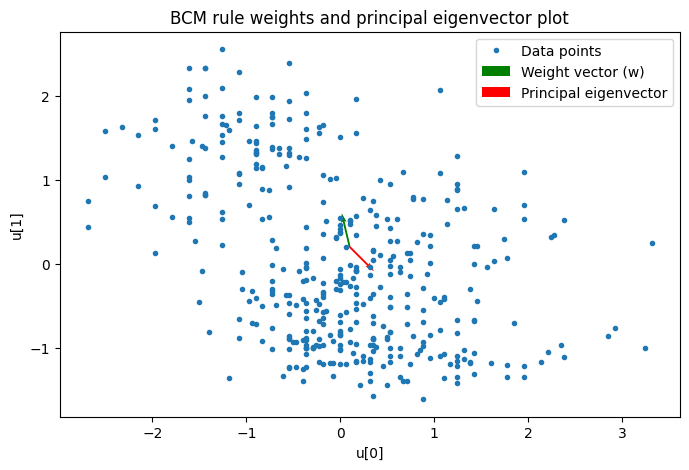

In [47]:
plot_1(u, w, p_evec, "BCM_rule", "dataset_2")

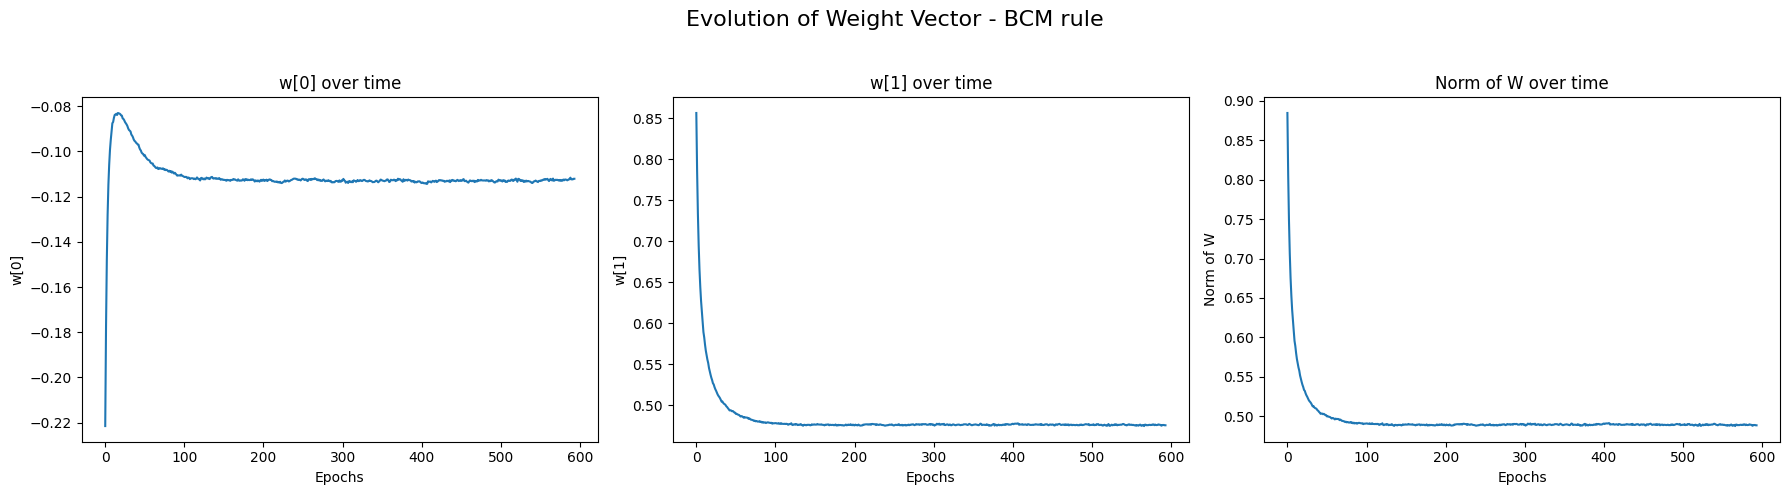

In [48]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "BCM_rule", "dataset_2")

### Bonus Track Assignment 2 – Covariance Rule

In [49]:
epochs = 1000   
lr = 0.001
delta = 0.00001
theta = 0.5
     
w, w_history, convergence = firing_rate_model("cov", u, epochs, lr, delta, theta=theta, seed=42)
save_weights(w_history, "covariance_rule", "dataset_2")

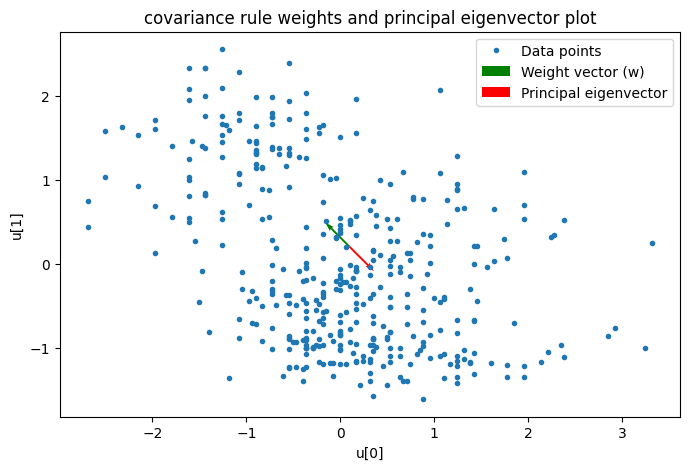

In [50]:
plot_1(u, w, p_evec, "covariance_rule", "dataset_2")

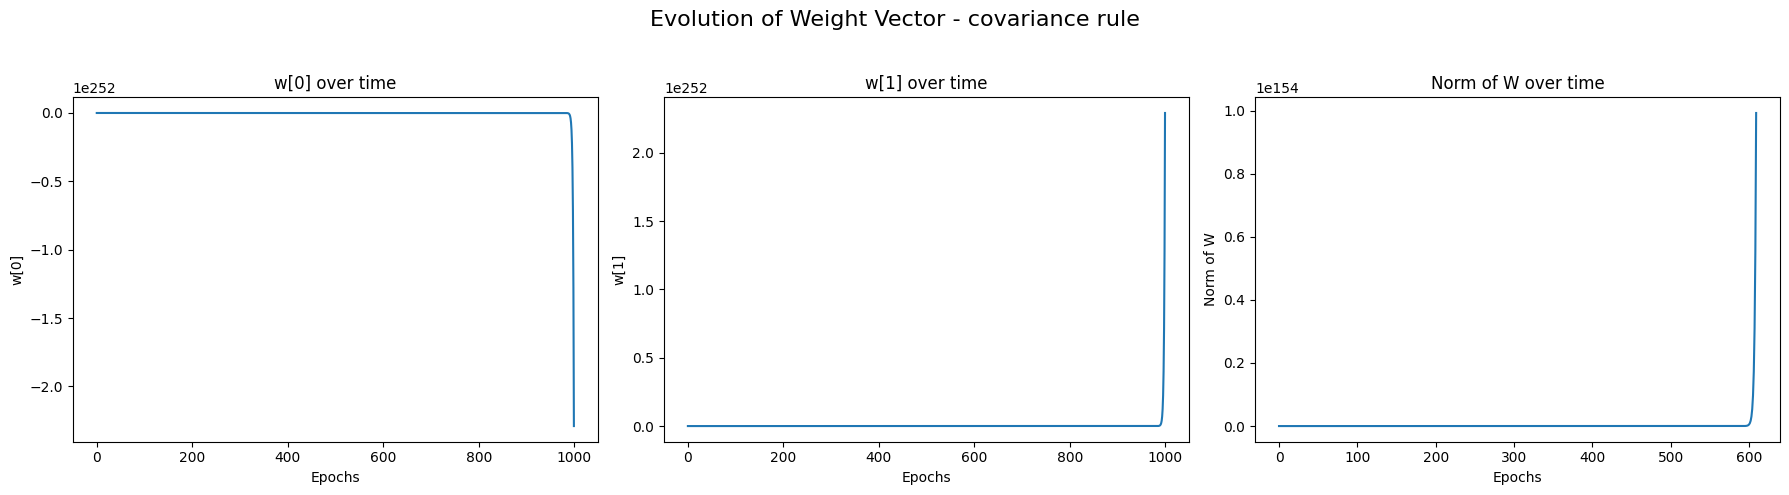

In [51]:
tspan = np.arange(0, convergence, 1)
plot_2(tspan, w_history, "covariance_rule", "dataset_2")